In [1]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import seaborn as sns

# set text size for plots to be larger
plt.rcParams.update({"font.size": 16})

import glob
import os
import tqdm


In [2]:
cwd = os.getcwd()
print(cwd)


/home/joe/ttop/cascade/model_analysis


In [3]:
# change current working directory to the folder where the data is stored
os.chdir("/home/joe/ttop/cascade/")
model_path = os.getcwd() + "/data/model/"
agent_path = os.getcwd() + "/data/agent/"
image_path = os.getcwd() + "/model_analysis/"


# Load Data

In [152]:
# load data/model/model_seed_1030_pp_-0.3_sd0.01_ep_0.1.csv into pandas dataframe
print(cwd)
df = pd.read_csv(model_path + "model_seed_1030_pp_-0.3_sd0.01_ep_0.1.csv")
df.head()


/home/joe/ttop/cascade


,Unnamed: 0,Seed,Citizen Count,Active Count,Support Count,Oppo Count,Jail Count,Speed of Spread,Security Density,Private Preference,Episilon,Threshold,Revolution
0,0,1030,1120,0,1120,0,0,0.0,0.01,-0.3,0.1,3.66356,False
1,1,1030,1120,0,1120,0,0,0.0,0.01,-0.3,0.1,3.66356,False
2,2,1030,1120,0,1120,0,0,0.0,0.01,-0.3,0.1,3.66356,False
3,3,1030,1120,0,1120,0,0,0.0,0.01,-0.3,0.1,3.66356,False
4,4,1030,1120,0,1120,0,0,0.0,0.01,-0.3,0.1,3.66356,False


In [4]:
def load_and_process_file(file_path):
    # Load the CSV file into a DataFrame
    df = pd.read_csv(file_path)

    # Rename 'Unnamed: 0' to 'Step'
    df.rename(columns={"Unnamed: 0": "Step"}, inplace=True)

    # Extract the needed values from the file name
    file_name = os.path.basename(file_path)

    # Create the new column name
    new_col_name = f"{file_name}"

    # change model name to be more readable
    new_col_name = new_col_name.replace("model_seed_", "Seed ")
    new_col_name = new_col_name.replace("agent_seed_", " Seed ")
    new_col_name = new_col_name.replace("_pp_", " PP ")
    new_col_name = new_col_name.replace("_sd", " SD ")
    new_col_name = new_col_name.replace("_ep_", " Ep ")
    new_col_name = new_col_name.replace("_rank_", " Rank ")
    new_col_name = new_col_name.replace("_iter_", " Iter ")
    new_col_name = new_col_name.replace(".csv", "")

    # Add the new column to the DataFrame
    df["model"] = new_col_name
    df["file_name"] = file_name

    return df


In [14]:
data_directory = model_path
all_files = [os.path.join(data_directory, f) for f in os.listdir(data_directory) if f.endswith('.csv')]
all_dataframes = [load_and_process_file(file_path) for file_path in all_files]
df = pd.concat(all_dataframes, ignore_index=True)
print(df.head())
 

   Step  Seed  Citizen Count  Active Count  Support Count  Oppose Count  \
0     0   344           1120             0           1120             0   
1     1   344           1120           394            688            38   
2     2   344           1120          1120              0             0   
3     0   328           1120             0           1120             0   
4     1   328           1120           400            672            48   

   Jail Count  Speed of Spread  Security Density  Private Preference  \
0           0         0.351786               0.0                  -1   
1           0         0.350000               0.0                  -1   
2           0         1.000000               0.0                  -1   
3           0         0.357143               0.0                  -1   
4           0         0.356250               0.0                  -1   

   Episilon  Threshold  Revolution                                   model  \
0       0.1    1.38629       False  Se

In [16]:
df['model'] = df.apply(lambda row: f"Seed {row['Seed']} SD{row['Security Density']} PP {row['Private Preference']} EP {row['Episilon']} Th {row['Threshold']}", axis=1)

In [17]:
unique_model_count = df["model"].nunique()
print(f"There are {unique_model_count} unique values in the 'model' column.")


There are 26 unique values in the 'model' column.


In [7]:
# Filter the DataFrame based on the 'Revolution' column
revolutions_df = final_df[final_df["Revolution"] == True]

# Count the unique "models" in the filtered DataFrame
unique_model_count = revolutions_df["model"].nunique()
print(f"{unique_model_count} different 'models' had a revolution.")


14 different 'models' had a revolution.


In [157]:
# Print the unique model names for the revolutions
print(revolutions_df["model"].unique())
print(revolutions_df["file_name"].unique())


['Seed 1037 PP -1 SD 0.01 Ep 0.2' 'Seed 1032 PP -0.8 SD 0.01 Ep 0.2'
 'Seed 1037 PP -1 SD 0.01 Ep 0.1' 'Seed 1030 PP -1 SD 0.01 Ep 0.1'
 'Seed 1032 PP -0.8 SD 0.01 Ep 0.1' 'Seed 1032 PP -1 SD 0.01 Ep 0.1'
 'Seed 1032 PP -1 SD 0.01 Ep 0.2']
['model_seed_1037_pp_-1_sd0.01_ep_0.2.csv'
 'model_seed_1032_pp_-0.8_sd0.01_ep_0.2.csv'
 'model_seed_1037_pp_-1_sd0.01_ep_0.1.csv'
 'model_seed_1030_pp_-1_sd0.01_ep_0.1.csv'
 'model_seed_1032_pp_-0.8_sd0.01_ep_0.1.csv'
 'model_seed_1032_pp_-1_sd0.01_ep_0.1.csv'
 'model_seed_1032_pp_-1_sd0.01_ep_0.2.csv']


In [158]:
# Print the count of models that had at least one Step with more than 560 Active Count
print(final_df[final_df["Active Count"] > 560]["model"].nunique())
# Print the unique model names that had at least one Step with more than 560 Active Count
print(final_df[final_df["Active Count"] > 560]["model"].unique())


35
['Seed 1038 PP -1 SD 0.01 Ep 0.8' 'Seed 1032 PP -1 SD 0.01 Ep 0.5'
 'Seed 1037 PP -1 SD 0.01 Ep 1' 'Seed 1037 PP -0.8 SD 0.01 Ep 1'
 'Seed 1035 PP -1 SD 0.01 Ep 0.8' 'Seed 1038 PP -0.8 SD 0.01 Ep 1'
 'Seed 1036 PP -1 SD 0.01 Ep 0.5' 'Seed 1036 PP -0.8 SD 0.01 Ep 1'
 'Seed 1037 PP -1 SD 0.01 Ep 0.2' 'Seed 1035 PP -1 SD 0.01 Ep 1'
 'Seed 1036 PP -1 SD 0.01 Ep 0.8' 'Seed 1037 PP -0.8 SD 0.01 Ep 0.5'
 'Seed 1032 PP -0.8 SD 0.01 Ep 0.2' 'Seed 1031 PP -1 SD 0.01 Ep 1'
 'Seed 1032 PP -1 SD 0.01 Ep 0.8' 'Seed 1038 PP -0.8 SD 0.01 Ep 0.8'
 'Seed 1038 PP -1 SD 0.01 Ep 1' 'Seed 1037 PP -1 SD 0.01 Ep 0.1'
 'Seed 1032 PP -0.8 SD 0.01 Ep 0.8' 'Seed 1032 PP -0.8 SD 0.01 Ep 0.5'
 'Seed 1030 PP -1 SD 0.01 Ep 0.5' 'Seed 1034 PP -1 SD 0.01 Ep 1'
 'Seed 1036 PP -1 SD 0.01 Ep 1' 'Seed 1030 PP -1 SD 0.01 Ep 0.8'
 'Seed 1033 PP -1 SD 0.01 Ep 1' 'Seed 1037 PP -0.8 SD 0.01 Ep 0.8'
 'Seed 1030 PP -1 SD 0.01 Ep 1' 'Seed 1038 PP -1 SD 0.01 Ep 0.5'
 'Seed 1037 PP -1 SD 0.01 Ep 0.8' 'Seed 1030 PP -1 SD 0.01 Ep 0

In [159]:
# Create a new column "Combined Count" which is the sum of Active Count and Oppo Count
final_df["Combined Count"] = final_df["Active Count"] + final_df["Oppo Count"]

# Filter the DataFrame based on the condition where "Combined Count" is greater than 560
filtered_df = final_df[final_df["Combined Count"] > 560]

# Count the unique models in the filtered DataFrame
unique_model_count = filtered_df["model"].nunique()
print(
    f"{unique_model_count} models had at least one Step with more than 560 combined Active Count and Oppo Count."
)


39 models had at least one Step with more than 560 combined Active Count and Oppo Count.


In [160]:
# Create a new column "Combined Count" which is the sum of Active Count and Oppo Count
final_df["Combined Count"] = final_df["Active Count"] + final_df["Oppo Count"]

# Filter the DataFrame based on the condition where "Combined Count" is greater than 112
filtered_df = final_df[final_df["Combined Count"] > 112]

# Count the unique models in the filtered DataFrame
unique_model_count = filtered_df["model"].nunique()
print(
    f"{unique_model_count} models had at least one Step with more than 112 combined Active Count and Oppo Count."
)


39 models had at least one Step with more than 112 combined Active Count and Oppo Count.


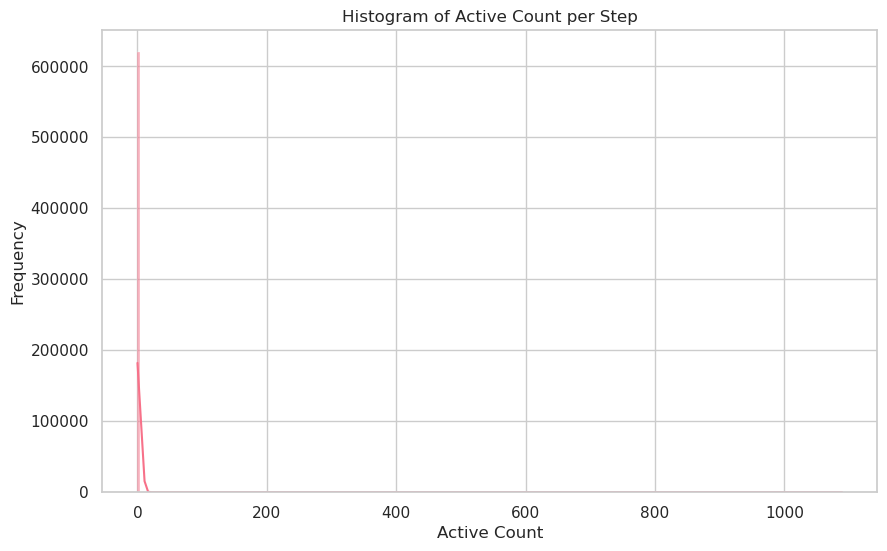

In [161]:
# Set the style and color palette for the plot
sns.set(style="whitegrid")
sns.set_palette("husl")

# Create the histogram using Seaborn's histplot
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df, x="Active Count", bins=300, kde=True, alpha=0.5)

# Customize the plot
plt.title("Histogram of Active Count per Step")
plt.xlabel("Active Count")
plt.ylabel("Frequency")

# Save the figure at 300 dpi
plt.savefig("active_count_histogram.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()


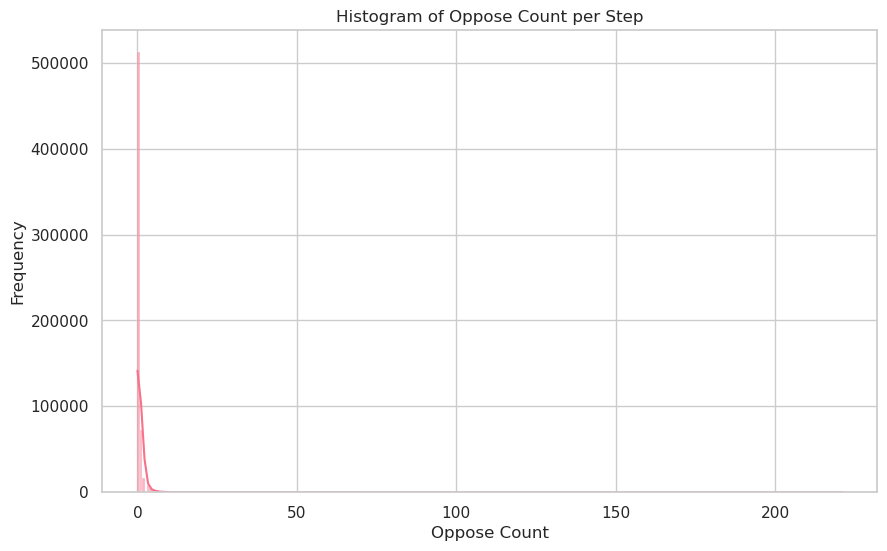

In [162]:
# Create the histogram using Seaborn's histplot
plt.figure(figsize=(10, 6))
sns.histplot(data=final_df, x="Oppo Count", bins=300, kde=True, alpha=0.5)

# Customize the plot
plt.title("Histogram of Oppose Count per Step")
plt.xlabel("Oppose Count")
plt.ylabel("Frequency")

# Save the figure at 300 dpi
plt.savefig("oppo_count_histogram.png", dpi=300, bbox_inches="tight")

# Display the plot
plt.show()


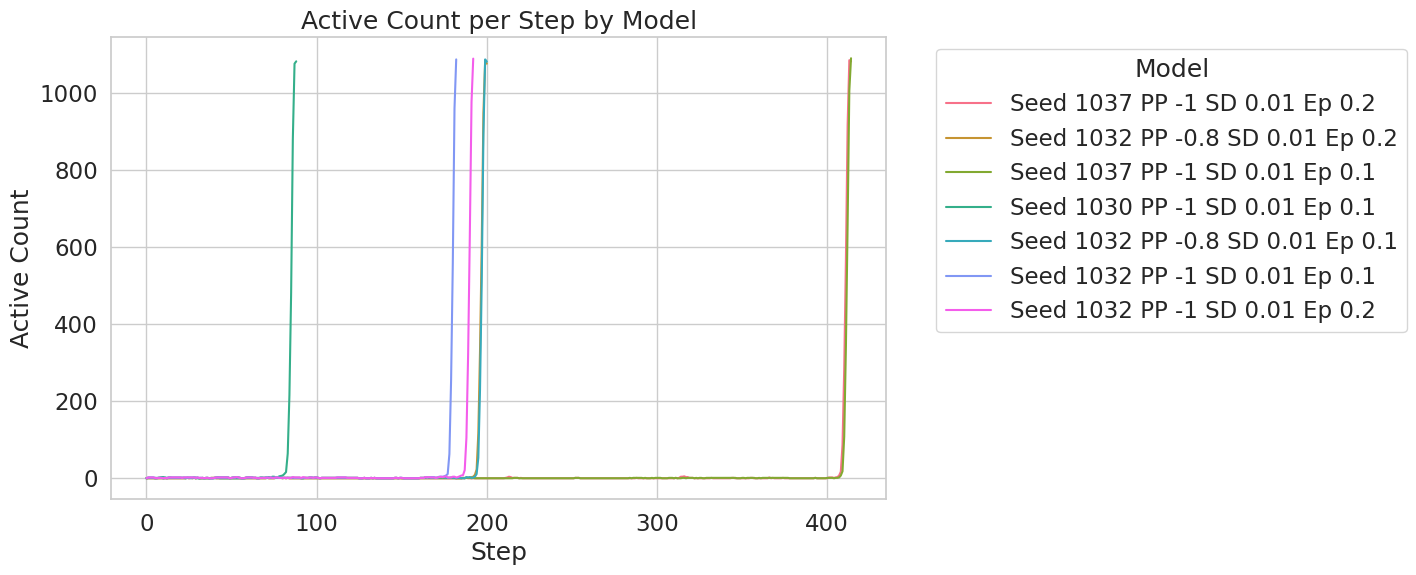

In [163]:
# Set the style, color palette, and font size for the plots
sns.set(style="whitegrid")
sns.set_palette("husl")
sns.set_context("notebook", font_scale=1.5)

# Filter the final_df DataFrame for the specified models
selected_models = [
    "Seed 1037 PP -1 SD 0.01 Ep 0.2",
    "Seed 1032 PP -0.8 SD 0.01 Ep 0.2",
    "Seed 1037 PP -1 SD 0.01 Ep 0.1",
    "Seed 1030 PP -1 SD 0.01 Ep 0.1",
    "Seed 1032 PP -0.8 SD 0.01 Ep 0.1",
    "Seed 1032 PP -1 SD 0.01 Ep 0.1",
    "Seed 1032 PP -1 SD 0.01 Ep 0.2",
]


filtered_df = final_df[final_df["model"].isin(selected_models)]

# Create the lineplot using Seaborn's lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x="Step", y="Active Count", hue="model")

# Customize the plot
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Active Count per Step by Model")
plt.xlabel("Step")
plt.ylabel("Active Count")

# Save the figure at 300 dpi
plt.savefig(
    image_path + "revolutions_line_active_count.png", dpi=300, bbox_inches="tight"
)


# Display the plot
plt.show()


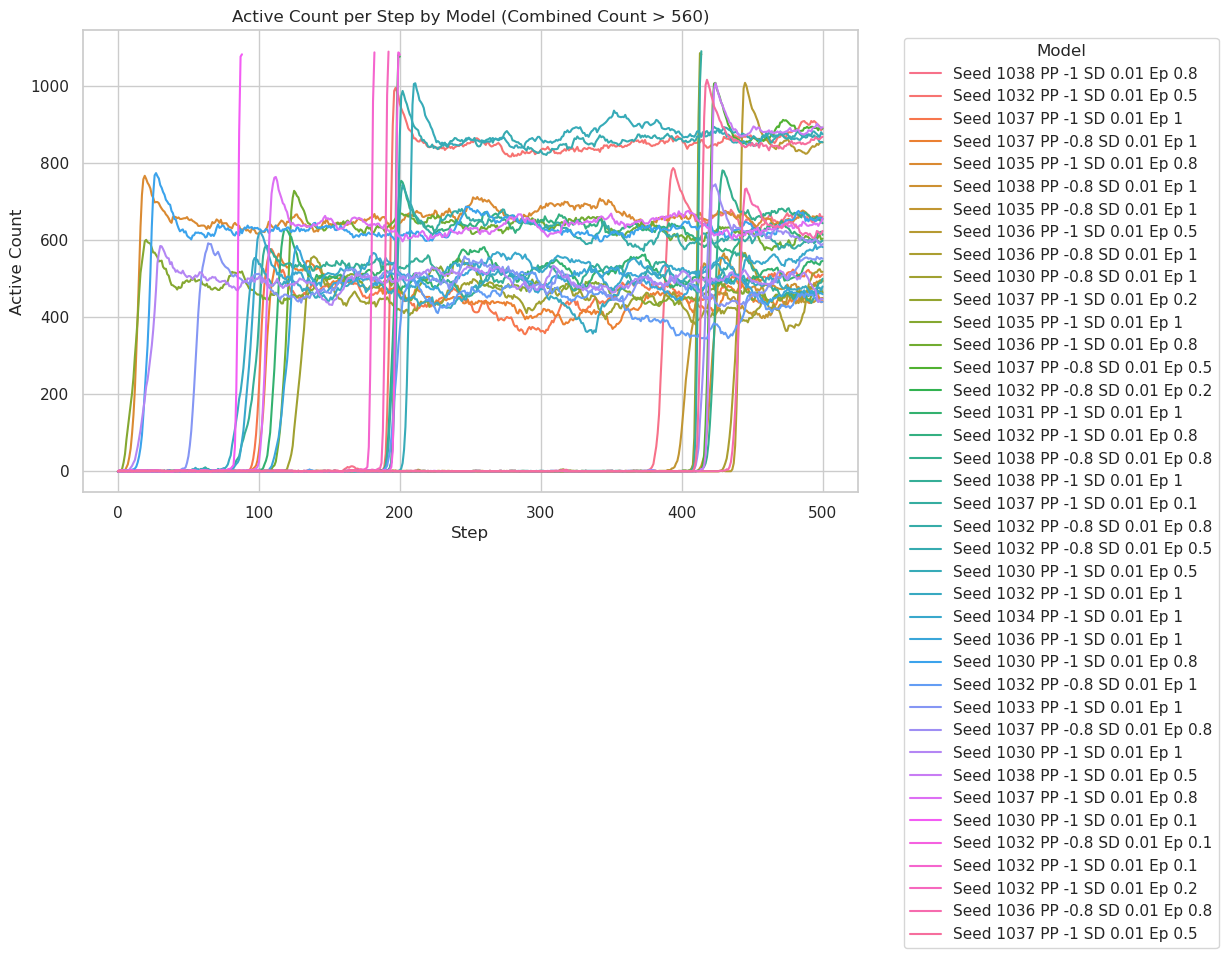

In [164]:
import matplotlib.colors as mcolors

# Set the style and color palette for the plot
sns.set(style="whitegrid")
sns.set_palette("husl")

# Filter the final_df DataFrame for rows with a combined count of Active and Oppo > 560
final_df["Combined Count"] = final_df["Active Count"] + final_df["Oppo Count"]
filtered_df = final_df[final_df["Combined Count"] > 560]

# Identify the unique models in the filtered DataFrame
unique_models = filtered_df["model"].unique()

# Filter the final_df DataFrame for the specified models
filtered_df = final_df[final_df["model"].isin(unique_models)]

# Create the lineplot using Seaborn's lineplot
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered_df, x="Step", y="Active Count", hue="model")

# Customize the plot
plt.legend(title="Model", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.title("Active Count per Step by Model (Combined Count > 560)")
plt.xlabel("Step")
plt.ylabel("Active Count")

# Display the plot
plt.show()


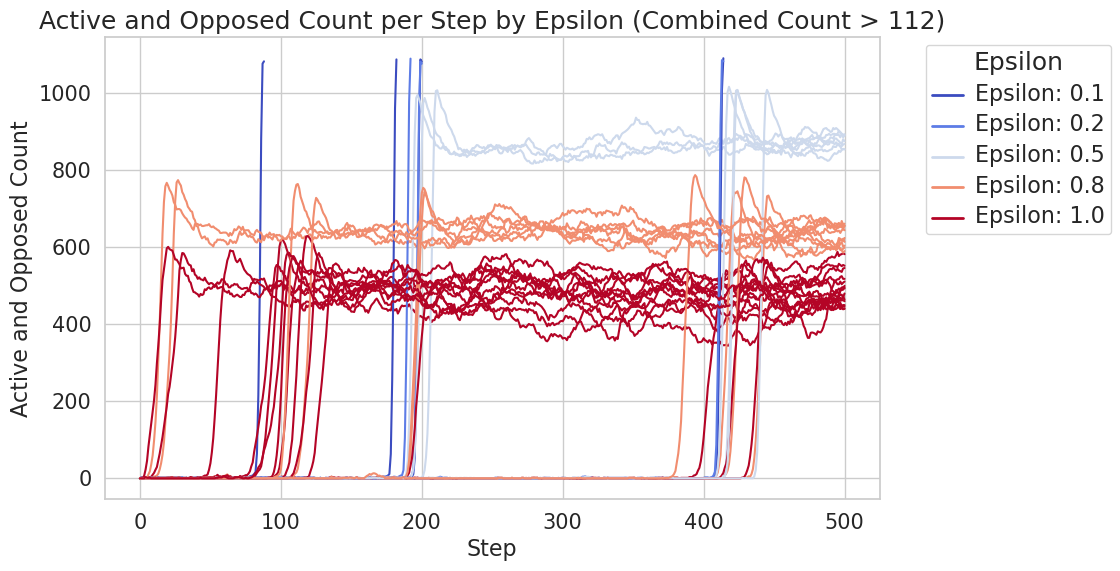

In [165]:
import matplotlib.colors as mcolors

# Set the style for the plot
sns.set(style="whitegrid")

# Filter the final_df DataFrame for rows with a combined count of Active and Oppo > 112
final_df["Combined Count"] = final_df["Active Count"] + final_df["Oppo Count"]
filtered_df = final_df[final_df["Combined Count"] > 112]

# Identify the unique models in the filtered DataFrame
unique_models = filtered_df["model"].unique()

# Filter the final_df DataFrame for the specified models
filtered_df = final_df[final_df["model"].isin(unique_models)]

# Identify the unique Epsilon values in the filtered DataFrame
unique_epsilons = np.sort(filtered_df["Episilon"].unique())

# Map Epsilon values to colors in a Red-Blue spectrum
norm = mcolors.Normalize(vmin=unique_epsilons.min(), vmax=unique_epsilons.max())
cmap = plt.get_cmap("coolwarm")
epsilon_colors = {epsilon: cmap(norm(epsilon)) for epsilon in unique_epsilons}

# Create a custom legend using Epsilon values and colors
legend_elements = [
    plt.Line2D(
        [0], [0], color=epsilon_colors[epsilon], lw=2, label=f"Epsilon: {epsilon}"
    )
    for epsilon in unique_epsilons
]

# Create the lineplot using Seaborn's lineplot
plt.figure(figsize=(10, 6))
plt.fontsize = 25
for model, group in filtered_df.groupby("model"):
    epsilon = group["Episilon"].iloc[0]
    plt.plot(group["Step"], group["Active Count"], color=epsilon_colors[epsilon])

# Customize the plot
legend = plt.legend(
    handles=legend_elements, title="Epsilon", bbox_to_anchor=(1.05, 1), loc="upper left"
)
plt.setp(legend.get_title(), fontsize=18)
plt.setp(legend.get_texts(), fontsize=16)
plt.title(
    "Active and Opposed Count per Step by Epsilon (Combined Count > 112)", fontsize=18
)
plt.xlabel("Step", fontsize=16)
plt.ylabel("Active and Opposed Count", fontsize=16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# Save the figure at 300 dpi
plt.savefig(image_path + "active_oppose_great_112.png", dpi=300, bbox_inches="tight")


# Display the plot
plt.show()


In [175]:
# Filter the final_df DataFrame for rows with a combined count of Active and Oppo > 112
filtered_df = final_df[final_df["Combined Count"] > 112]

model_count_by_epsilon = filtered_df.groupby("Episilon")["model"].nunique()

# Display the count of models by Epsilon values
print(model_count_by_epsilon)


Episilon
0.1     4
0.2     3
0.5     7
0.8    10
1.0    15
Name: model, dtype: int64


In [177]:
# Filter the final_df DataFrame for rows with a combined count of Active and Oppo > 112
filtered_df = final_df[final_df["Combined Count"] > 112]

# Group the filtered DataFrame by Epsilon and Security Density and count the unique models
model_count_by_epsilon_sd = filtered_df.groupby(["Episilon", "Security Density"])[
    "model"
].nunique()

# Display the count of models by Epsilon values
print(model_count_by_epsilon_sd)


Episilon  Security Density
0.1       0.01                 4
0.2       0.01                 3
0.5       0.01                 7
0.8       0.01                10
1.0       0.01                15
Name: model, dtype: int64


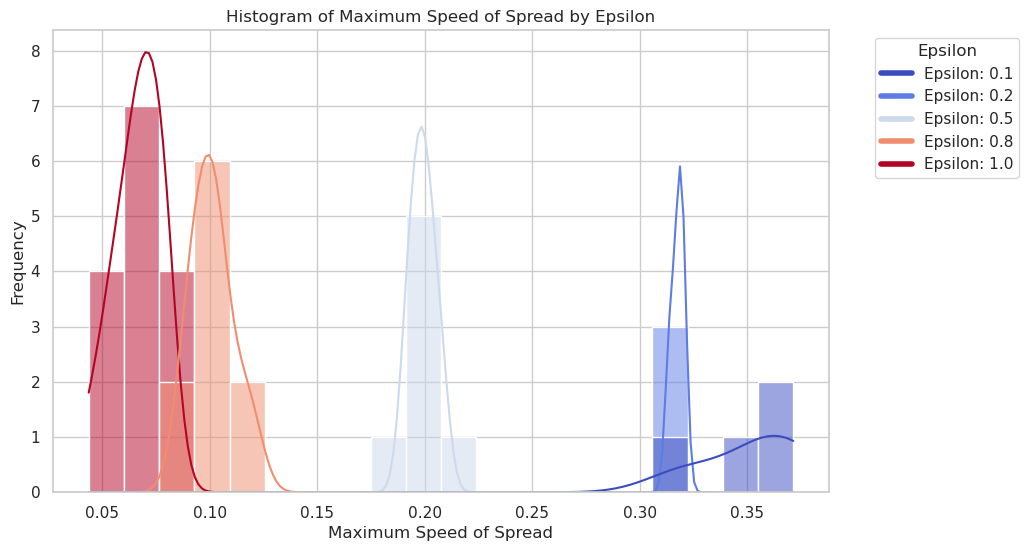

In [167]:
# Filter the final_df DataFrame for rows with a combined count of Active and Oppo > 112
final_df["Combined Count"] = final_df["Active Count"] + final_df["Oppo Count"]
filtered_df = final_df[final_df["Combined Count"] > 112]

# Identify the unique models in the filtered DataFrame
unique_models = filtered_df["model"].unique()

# Filter the final_df DataFrame for the specified models
filtered_df = final_df[final_df["model"].isin(unique_models)]


# Group the dataframe by the 'model' column and find the maximum speed of spread for each group
max_speed_df = filtered_df.groupby('model')['Speed of Spread'].max().reset_index()

# Merge the max_speed_df with the epsilon values
max_speed_epsilon_df = max_speed_df.merge(filtered_df[['model', 'Episilon']].drop_duplicates(), on='model')

# Set the style for the plot
sns.set(style='whitegrid')

# Map Epsilon values to colors in a Red-Blue spectrum
unique_epsilons = np.sort(max_speed_epsilon_df['Episilon'].unique())
norm = plt.Normalize(vmin=unique_epsilons.min(), vmax=unique_epsilons.max())
cmap = plt.get_cmap('coolwarm')
epsilon_colors = {epsilon: cmap(norm(epsilon)) for epsilon in unique_epsilons}

# Create a custom legend using Epsilon values and colors
legend_elements = [plt.Line2D([0], [0], color=epsilon_colors[epsilon], lw=4, label=f'Epsilon: {epsilon}') for epsilon in unique_epsilons]

# Create the histogram
plt.figure(figsize=(10, 6))
sns.histplot(data=max_speed_epsilon_df, x='Speed of Spread', hue='Episilon', palette=epsilon_colors, bins=20, kde=True)

# Customize the plot
plt.legend(handles=legend_elements, title='Epsilon', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Histogram of Maximum Speed of Spread by Epsilon')
plt.xlabel('Maximum Speed of Spread')
plt.ylabel('Frequency')

# Save the figure at 300 dpi
plt.savefig(image_path + 'histogram_max_speed_spread.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


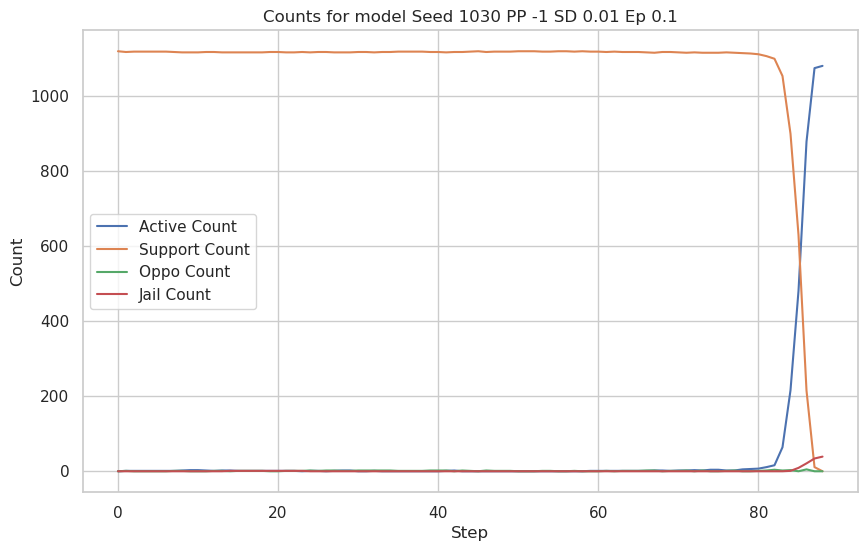

In [187]:
# Find the model with the smallest maximum step value
model_with_smallest_max_step = revolutions_full_df.groupby('model')['Step'].max().idxmin()

# Filter the data for that specific model
filtered_data = revolutions_full_df[revolutions_full_df['model'] == model_with_smallest_max_step]

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Step'], filtered_data['Active Count'], label='Active Count')
plt.plot(filtered_data['Step'], filtered_data['Support Count'], label='Support Count')
plt.plot(filtered_data['Step'], filtered_data['Oppo Count'], label='Oppo Count')
plt.plot(filtered_data['Step'], filtered_data['Jail Count'], label='Jail Count')

# Customize the plot
plt.xlabel('Step')
plt.ylabel('Count')
plt.title(f'Counts for model {model_with_smallest_max_step}')
plt.legend()

# Save the figure at 300 dpi
plt.savefig(image_path + f'counts_for_{model_with_smallest_max_step}.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


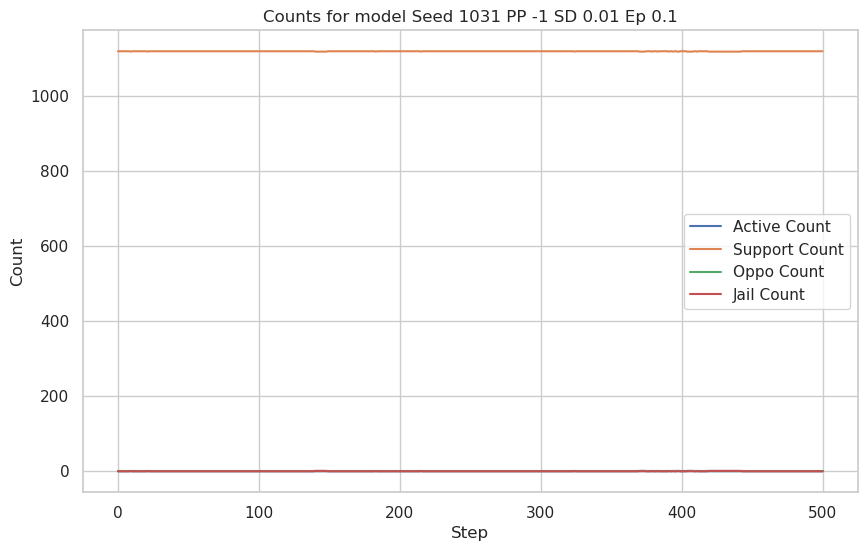

In [189]:
# Define the model name
model_name = 'Seed 1031 PP -1 SD 0.01 Ep 0.1'

# Filter the data for the specified model
filtered_data = final_df[final_df['model'] == model_name]

# Create the line graph
plt.figure(figsize=(10, 6))
plt.plot(filtered_data['Step'], filtered_data['Active Count'], label='Active Count')
plt.plot(filtered_data['Step'], filtered_data['Support Count'], label='Support Count')
plt.plot(filtered_data['Step'], filtered_data['Oppo Count'], label='Oppo Count')
plt.plot(filtered_data['Step'], filtered_data['Jail Count'], label='Jail Count')

# Customize the plot
plt.xlabel('Step')
plt.ylabel('Count')
plt.title(f'Counts for model {model_name}')
plt.legend()

# Save the figure at 300 dpi
plt.savefig(image_path + f'counts_for_{model_name}.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [195]:
def change_model_to_agent(model_filepath):
    """Change the model name in the filepath to the agent name."""

    return model_filepath.replace("model", "agent")

In [233]:
# Filter the DataFrame based on the 'Revolution' column
revolutions_df = final_df[final_df["Revolution"] == True]

# Create dataframe of full data for each model that experienced a revolution
unique_models = revolutions_df["model"].unique()
revolutions_full_df = final_df[final_df['model'].isin(unique_models)]

revolution_model_filepaths = revolutions_df["file_name"].unique()
revolution_model_filepaths = list(revolution_model_filepaths)
revolution_model_filepaths.append("agent_seed_1031_pp_-1_sd0.01_ep_0.1.csv")
revolution_model_filepaths.append("agent_seed_1030_pp_-1_sd0.01_ep_1.csv")

# Create a list of agent filepaths
agent_filepaths = [agent_path + change_model_to_agent(filepath) for filepath in revolution_model_filepaths]

In [234]:
# Replace this with the directory containing your files
data_directory = agent_path

# Get the list of all files in the data directory
all_files = [os.path.join(data_directory, f) for f in os.listdir(data_directory) if f.endswith('.csv')]

# Process all files and store the resulting DataFrames in a list
all_dataframes = [load_and_process_file(file_path) for file_path in all_files if file_path in agent_filepaths]

# Concatenate all DataFrames into a single DataFrame
agent_df = pd.concat(all_dataframes, ignore_index=True)

# Check the final DataFrame
print(agent_df.shape)


(3066064, 20)


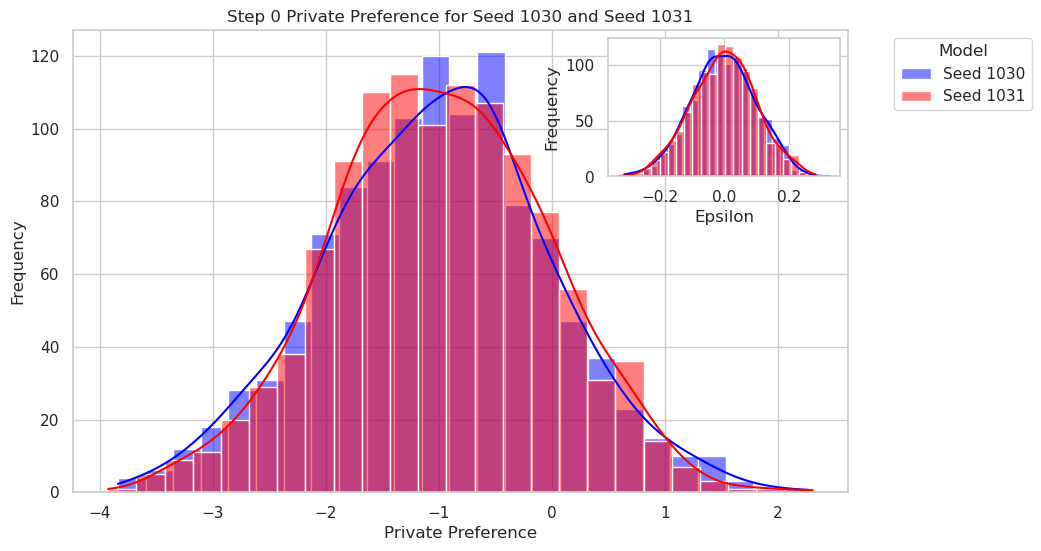

In [221]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Replace these with the correct model names for the two models
model_1030_name = 'agent_seed_1030_pp_-1_sd0.01_ep_0.1.csv'
model_1031_name = 'agent_seed_1031_pp_-1_sd0.01_ep_0.1.csv'

# Filter the agent_df for each model at step 0
agent_df_1030 = agent_df[(agent_df['file_name'] == model_1030_name) & (agent_df['Step'] == 1)]
agent_df_1031 = agent_df[(agent_df['file_name'] == model_1031_name) & (agent_df['Step'] == 1)]

# Create the overlay plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=agent_df_1030, x='private_preference', kde=True, color='blue', label='Seed 1030', alpha=0.5, ax=ax)
sns.histplot(data=agent_df_1031, x='private_preference', kde=True, color='red', label='Seed 1031', alpha=0.5, ax=ax)

# Customize the plot
ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Step 0 Private Preference for Seed 1030 and Seed 1031')
ax.set_xlabel('Private Preference')
ax.set_ylabel('Frequency')

# Create the inset plot
ax_inset = inset_axes(ax, width='30%', height='30%', loc='upper right')
sns.histplot(data=agent_df_1030, x='epsilon', kde=True, color='blue', label='Seed 1030', alpha=0.5, ax=ax_inset)
sns.histplot(data=agent_df_1031, x='epsilon', kde=True, color='red', label='Seed 1031', alpha=0.5, ax=ax_inset)
ax_inset.set_xlabel('Epsilon')
ax_inset.set_ylabel('Frequency')
ax_inset.legend().remove()

# Save the figure at 300 dpi
plt.savefig(image_path + 'overlay_pp_inset.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [216]:
# mean of private preference for seed 1030 and 1031
mean_1030 = agent_df_1030['private_preference'].mean()
mean_1031 = agent_df_1031['private_preference'].mean()
print(mean_1030)
print(mean_1031)

-1.0173897461720078
-0.9949721721091346


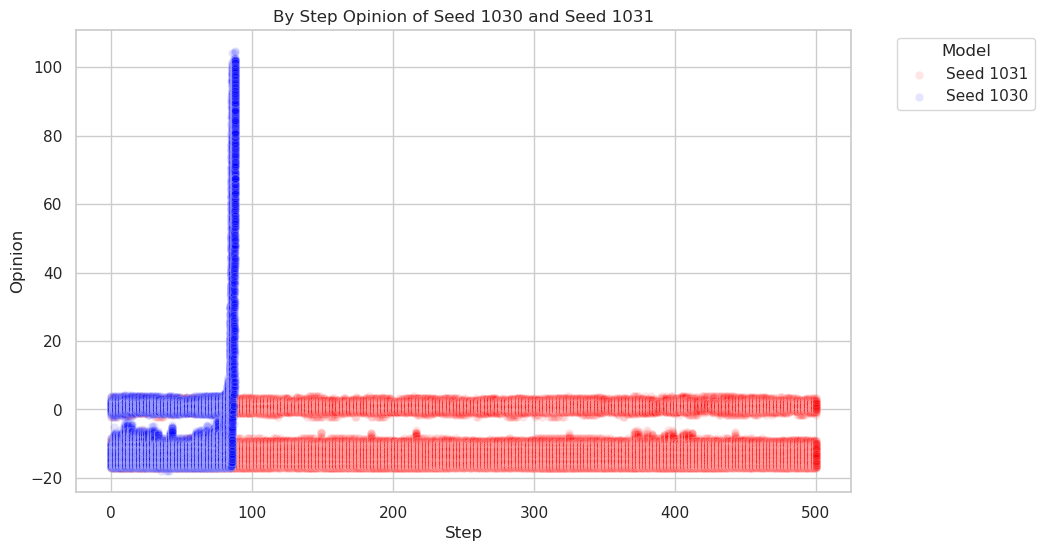

In [240]:
# Replace these with the correct model names for the two models
model_1030_name = 'agent_seed_1030_pp_-1_sd0.01_ep_0.1.csv'
model_1031_name = 'agent_seed_1031_pp_-1_sd0.01_ep_0.1.csv'

# Filter the agent_df for each model at step 0
agent_df_1030_full = agent_df[(agent_df['file_name'] == model_1030_name)]
agent_df_1031_full = agent_df[(agent_df['file_name'] == model_1031_name)]

# Create the overlay plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=agent_df_1031_full, x='Step', y='opinion', color='red', label='Seed 1031', alpha=0.1)
sns.scatterplot(data=agent_df_1030_full, x='Step', y='opinion', color='blue', label='Seed 1030', alpha=0.1)

# Customize the plot
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('By Step Opinion of Seed 1030 and Seed 1031')
plt.xlabel('Step')
plt.ylabel('Opinion')

# Save the figure at 300 dpi
plt.savefig(image_path + 'scatter_pp.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


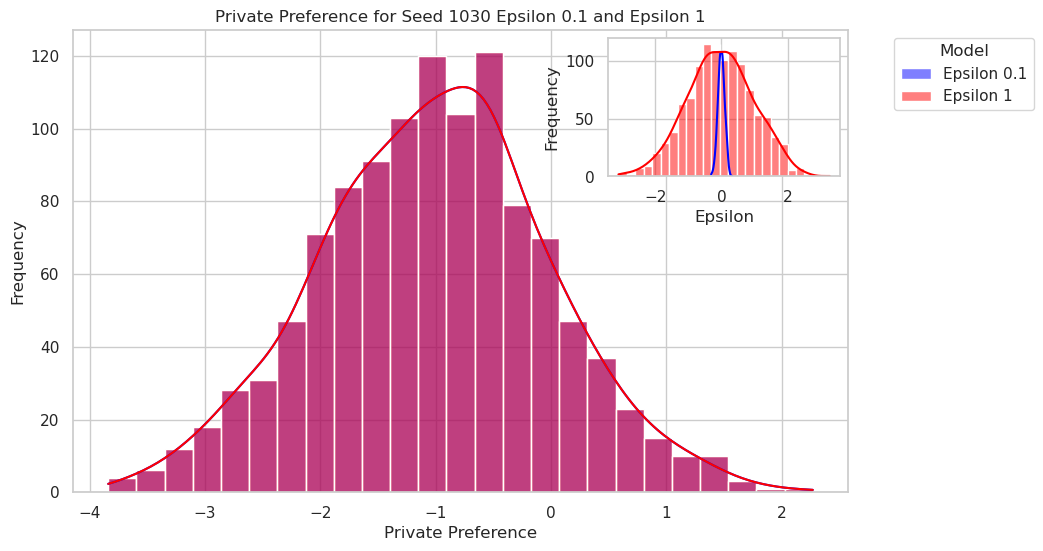

In [235]:
# Replace these with the correct model names for the two models
model_1030_eplow_name = 'agent_seed_1030_pp_-1_sd0.01_ep_0.1.csv'
model_1030_ephigh_name = 'agent_seed_1030_pp_-1_sd0.01_ep_1.csv'

# Filter the agent_df for each model at step 0
model_1030_eplow = agent_df[(agent_df['file_name'] == model_1030_eplow_name) & (agent_df['Step'] == 1)]
model_1030_ephigh = agent_df[(agent_df['file_name'] == model_1030_ephigh_name) & (agent_df['Step'] == 1)]

# Create the overlay plot
fig, ax = plt.subplots(figsize=(10, 6))
sns.histplot(data=model_1030_eplow, x='private_preference', kde=True, color='blue', label='Epsilon 0.1', alpha=0.5, ax=ax)
sns.histplot(data=model_1030_ephigh, x='private_preference', kde=True, color='red', label='Epsilon 1', alpha=0.5, ax=ax)

# Customize the plot
ax.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
ax.set_title('Private Preference for Seed 1030 Epsilon 0.1 and Epsilon 1')
ax.set_xlabel('Private Preference')
ax.set_ylabel('Frequency')

# Create the inset plot
ax_inset = inset_axes(ax, width='30%', height='30%', loc='upper right')
sns.histplot(data=model_1030_eplow, x='epsilon', kde=True, color='blue', label='Epsilon 0.1', alpha=0.5, ax=ax_inset)
sns.histplot(data=model_1030_ephigh, x='epsilon', kde=True, color='red', label='Epsilon 1', alpha=0.5, ax=ax_inset)
ax_inset.set_xlabel('Epsilon')
ax_inset.set_ylabel('Frequency')
ax_inset.legend().remove()

# Save the figure at 300 dpi
plt.savefig(image_path + 'overlay_pp_inset_low_high.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


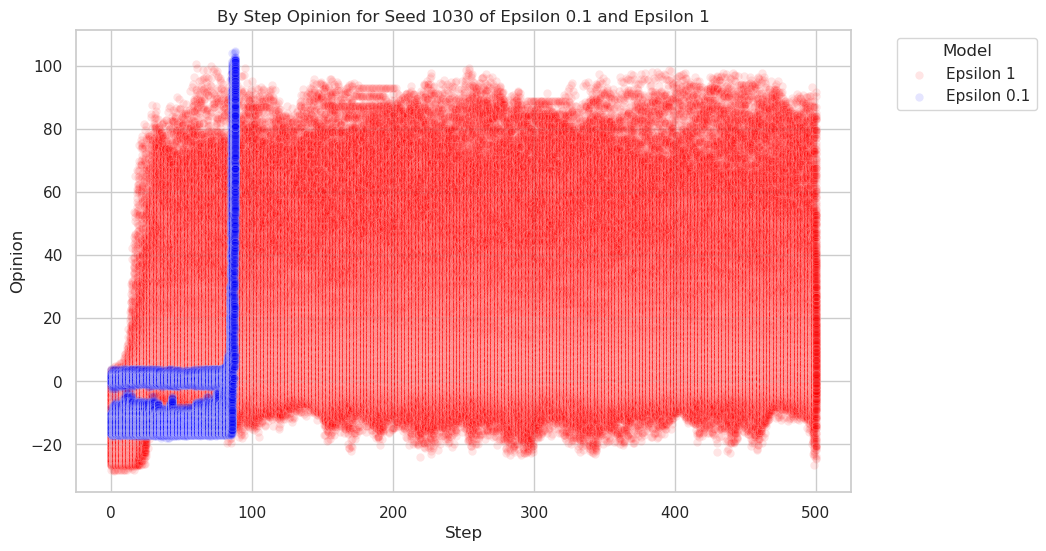

In [241]:
# Replace these with the correct model names for the two models
model_1030_eplow_name = 'agent_seed_1030_pp_-1_sd0.01_ep_0.1.csv'
model_1030_ephigh_name = 'agent_seed_1030_pp_-1_sd0.01_ep_1.csv'

# Filter the agent_df for each model at step 0
model_1030_eplow = agent_df[(agent_df['file_name'] == model_1030_eplow_name)]
model_1030_ephigh = agent_df[(agent_df['file_name'] == model_1030_ephigh_name)]

# Create the overlay plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=model_1030_ephigh, x='Step', y='opinion', color='red', label='Epsilon 1', alpha=0.1)
sns.scatterplot(data=model_1030_eplow, x='Step', y='opinion', color='blue', label='Epsilon 0.1', alpha=0.1)

# Customize the plot
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('By Step Opinion for Seed 1030 of Epsilon 0.1 and Epsilon 1')
plt.xlabel('Step')
plt.ylabel('Opinion')

# Save the figure at 300 dpi
plt.savefig(image_path + 'scatter_pp_low_high.png', dpi=300, bbox_inches='tight')

# Display the plot
plt.show()


In [243]:
# maximum value of Combined Count in final_df for file_path model_seed_1030_pp_-1_sd0.01_ep_1.csv
max_combined_count = final_df[(final_df['file_name'] == 'model_seed_1030_pp_-1_sd0.01_ep_1.csv')]['Combined Count'].max()
max_combined_count

786